In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
transactions = pd.read_csv(r'C:\Users\KIIT\Desktop\european creditcard dataset.csv')

In [3]:
transactions.shape

(284807, 31)

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
transactions.isnull().any().any()

False

In [6]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [8]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']#response

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [11]:
X_train.shape

(199364, 30)

In [12]:
X_test.shape

(85443, 30)

In [13]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 30)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 30)
Number transactions y_test dataset:  (85443,)


In [14]:
from sklearn.feature_selection import SelectPercentile

In [15]:
select = SelectPercentile(percentile = 75)

In [16]:
select.fit(X_train,y_train)

SelectPercentile(percentile=75)

In [17]:
X_train_selected=select.transform(X_train)

In [18]:
X_test_selected=select.transform(X_test)

In [19]:
print('X_train.shape is :{}'.format(X_train.shape))

X_train.shape is :(199364, 30)


In [20]:
print('X_train_selected.shape is :{}'.format(X_train_selected.shape))

X_train_selected.shape is :(199364, 22)


In [21]:
pip install -U scikit-learn==0.24.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-0.24.1.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [56 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 351, in <module>
      main()
    File "C:\ProgramData\anacon

In [22]:
pip install -U scikit-learn==1.2.2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
!pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [24]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(random_state = 2)

In [27]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [28]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

After OverSampling, the shape of train_X: (398040, 30)


In [29]:
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_y: (398040,) 



In [30]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

After OverSampling, counts of label '1': 199020


In [31]:
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '0': 199020


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
stdscaler=StandardScaler()

In [34]:
X=stdscaler.fit_transform(X)

In [35]:
X

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
 lr= LogisticRegression()

In [38]:
lr.fit(X_train_res, y_train_res.ravel())

LogisticRegression()

In [39]:
lr.fit(X_train_selected,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predictions = lr.predict(X_test_selected)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, predictions)

0.998735999438222

In [43]:
from sklearn.metrics import matthews_corrcoef

In [44]:
MCC=matthews_corrcoef(y_test,predictions)

In [45]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.6589231737099539


In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.62      0.70      0.66       148

    accuracy                           1.00     85443
   macro avg       0.81      0.85      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, predictions)

array([[85231,    64],
       [   44,   104]], dtype=int64)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier()

In [52]:
rf.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=5)

In [53]:
predictions=rf.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.81      0.86       148

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test, predictions)

0.9995318516437859

In [58]:
from sklearn.metrics import matthews_corrcoef

In [59]:
MCC=matthews_corrcoef(y_test,predictions)

In [60]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.8583162400698313


In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test, predictions)

array([[85283,    12],
       [   28,   120]], dtype=int64)

In [63]:
import sklearn.metrics as metrics

In [64]:
probs = rf.predict_proba(X_test)

In [65]:
preds = probs[:,1]

In [66]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [67]:
roc_auc = metrics.auc(fpr, tpr)

In [68]:
import matplotlib.pyplot as plt

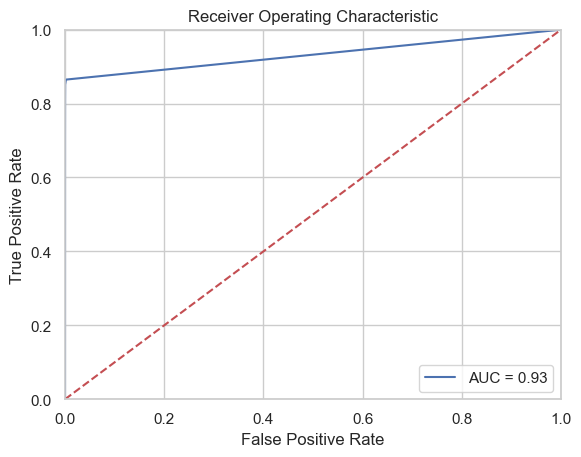

In [69]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
G_NB = GaussianNB()

In [72]:
G_NB.fit(X_train, y_train)

GaussianNB()

In [73]:
predictions=G_NB.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.72      0.25       148

    accuracy                           0.99     85443
   macro avg       0.58      0.85      0.62     85443
weighted avg       1.00      0.99      0.99     85443



In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test, predictions)

0.9926149596807228

In [78]:
from sklearn.metrics import matthews_corrcoef

In [79]:
MCC=matthews_corrcoef(y_test,predictions)

In [80]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.32837649845566586


In [81]:
import sklearn.metrics as metrics

In [82]:
probs = G_NB.predict_proba(X_test)

In [83]:
preds = probs[:,1]

In [84]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [85]:
roc_auc = metrics.auc(fpr, tpr)

In [86]:
import matplotlib.pyplot as plt

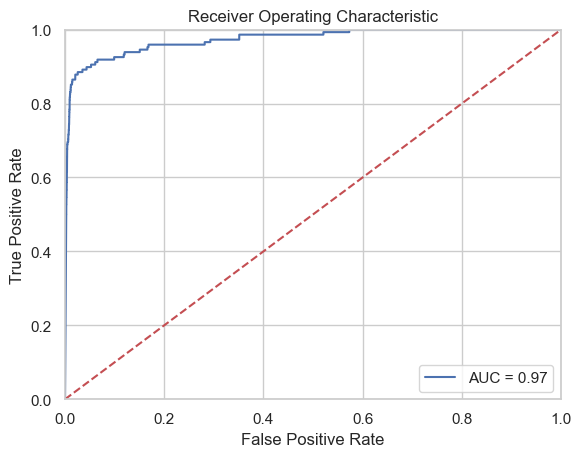

In [87]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
from sklearn.naive_bayes import BernoulliNB

In [89]:
BNB_Classifier2 = BernoulliNB()

In [90]:
BNB_Classifier2.fit(X_train_res, y_train_res.ravel())

BernoulliNB()

In [91]:
BNB_Classifier2.fit(X_train_selected,y_train)

BernoulliNB()

In [92]:
predictions = BNB_Classifier2.predict(X_test_selected)

In [93]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.66      0.75       148

    accuracy                           1.00     85443
   macro avg       0.93      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test, predictions)

0.9992275552122467

In [96]:
from sklearn.metrics import matthews_corrcoef

In [97]:
MCC=matthews_corrcoef(y_test,predictions)

In [98]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.7541073993680298


In [99]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [100]:
from xgboost import XGBClassifier

In [101]:
model = XGBClassifier()

In [102]:
model.fit(X_train,y_train.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [103]:
predictions=model.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

In [105]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.83      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [106]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test, predictions)

0.999602073897218

In [108]:
from sklearn.metrics import matthews_corrcoef

In [109]:
MCC=matthews_corrcoef(y_test,predictions)

In [110]:
print(" Matthews correlation coefficient is{}".format(MCC))

 Matthews correlation coefficient is0.8798151092388432


In [111]:
import sklearn.metrics as metrics

In [112]:
probs = model.predict_proba(X_test)

In [113]:
preds = probs[:,1]

In [114]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [115]:
roc_auc = metrics.auc(fpr, tpr)

In [116]:
import matplotlib.pyplot as plt

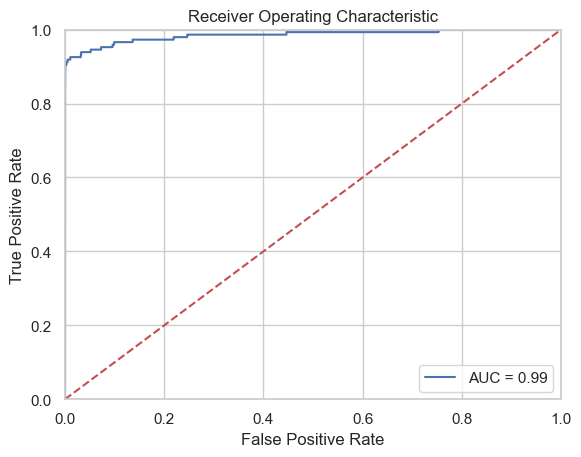

In [117]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()